In [1]:
from micrograd.core import Tensor, Op, OpNode
from micrograd.ops import *
import numpy as np 
import graphviz

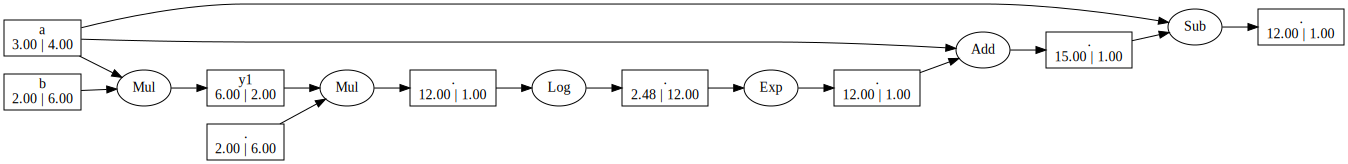

In [2]:
#type: ignore

def build_graph(node: Tensor):
    nodes = []
    edges = []

    def _build(n: Tensor|OpNode):
        nodes.append(n)
        if type(n) == Tensor:
            if n.source is not None: 
                edges.append((n.source, n))
                _build(n.source)
        else:
            for c in n.inputs:
                edges.append((c, n))
                _build(c)

    _build(node)
    return nodes, edges

def draw_graph(nodes, edges):
    dot = graphviz.Digraph("", graph_attr={'rankdir': 'LR'})

    for n in nodes:
        if type(n) == Tensor:
            if n.data.squeeze().shape != ():
                label = f"{n.name}\n{n.data.shape} | {n.grad.shape}"
            else:
                label = f"{n.name}\n{n.data.item():.2f} | {n.grad.item():.2f}"
            color = "white"
            shape = "box"
        else:
            label = f"{n.name}"
            color = "white"
            shape = "ellipse"

        dot.node(str(id(n))+n.name, label=label,
                 fillcolor=color, style="filled", shape=shape, margin='0')
        
    for a, b in edges:
        dot.edge(str(id(a))+a.name, str(id(b))+b.name)

    return dot

def draw(node: Tensor):
    nodes, edges = build_graph(node)
    return draw_graph(nodes, edges)

a = Tensor(3, name="a")
b = Tensor(2, name="b")
y1 = a * b; y1.name = "y1"
y2 = (y1 * 2).log().exp() + a - a

# y2 = exp(ln(2*a*b)) = a*b => 

y2.backward()
nodes, edges = build_graph(y2)
draw_graph(nodes, edges)

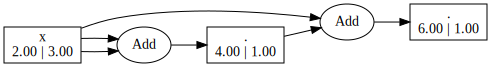

In [3]:
x = Tensor(2, name="x")
y1 = x.log(); y1.name = "y1"
y2 = x.log(); y2.name = "y2"
z = x + x + x

z.backward()
nodes, edges = build_graph(z)
draw_graph(nodes, edges)

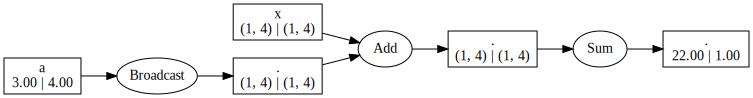

In [4]:
x = Tensor(np.array([[1,2,3,4]]), name="x")
a = Tensor(np.array([[3]]), name="a")
y = x + a

w = y.sum()
w.backward()
draw(w)

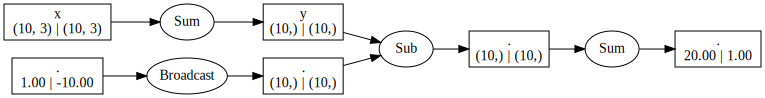

In [5]:
x = Tensor(np.ones((10, 3)), name="x")
y = x.sum(axis=1); y.name = "y"
w = (y - 1.0).sum(axis=None)
w.backward()
draw(w)